# Infosys Springboard Internship Project
## Real-Time Industry Insight & Strategic Intelligence System
### Sprint 1 – Data Sourcing & Handling
**Team Members:** Gopichand, Anshika, Janmejay

**Objective:** Collect, clean, and visualize real-time company or market data from external open sources.


## Step 1: Interactive User Input
We allow users to enter a **company or asset name** to fetch relevant data dynamically.


In [116]:
# User input for asset/company
asset_name = input("Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): ")
print(f"\nData analysis will be performed for: {asset_name}")

Enter the company name (e.g., Infosys, Rakuten, Netflix, TCS): Netflix

Data analysis will be performed for: Netflix


##  Step 2: Import Required Libraries
We use the following Python libraries:
- `requests` & `BeautifulSoup` for scraping web data
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `textblob` for sentiment analysis
- `yfinance` for market data
- `wikipedia` for Wikipedia summaries


In [117]:
# Install required libraries (run once)
!pip install yfinance textblob beautifulsoup4 lxml wikipedia feedparser faker

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import yfinance as yf
import wikipedia
from bs4 import BeautifulSoup
import feedparser
from faker import Faker
import random
import datetime

# Set seaborn style
sns.set(style="whitegrid")

## Step 3: Fetch Wikipedia Summary
We fetch a **short summary** of the asset/company from Wikipedia for context.


In [119]:
try:
    # Attempt to fetch summary by appending ' company' to the asset name
    try:
        wiki_summary = wikipedia.summary(f"{asset_name} company", sentences=5)
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
    except wikipedia.exceptions.PageError:
        # If appending ' company' doesn't work, try the original asset name
        wiki_summary = wikipedia.summary(asset_name, sentences=5)
        print(" Wikipedia Summary:\n")
        print(wiki_summary)
except Exception as e:
    print(f"Could not fetch Wikipedia summary: {e}")

 Wikipedia Summary:

Netflix, Inc. is an American media company founded on August 29, 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, and currently based in Los Gatos, California, with production offices and stages at the Los Angeles-based Hollywood studios (formerly old Warner Brothers studios) and the Albuquerque Studios (formerly ABQ studios). It owns and operates an eponymous over-the-top subscription video on-demand service, which showcases acquired and original programming as well as third-party content licensed from other production companies and distributors. Netflix is also the first streaming media company to be a member of the Motion Picture Association.
Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business.


## Step 4: Fetch Yahoo Finance Data
We fetch **historical market data** (last 30 days) for the asset using Yahoo Finance.

In [120]:
try:
    ticker = yf.Ticker(asset_name if asset_name.upper() in ["BTC-USD","TSLA","AAPL"] else "BTC-USD")
    market_data = ticker.history(period="1mo", interval="1d")
    market_data.reset_index(inplace=True)
    print(f"\n Market Data Sample for {asset_name}:")
    display(market_data.head())
except Exception as e:
    print(f"Could not fetch Yahoo Finance data: {e}")


 Market Data Sample for Netflix:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-09-24 00:00:00+00:00,112007.664062,113986.273438,111229.640625,113328.632812,48044595085,0.0,0.0
1,2025-09-25 00:00:00+00:00,113330.164062,113541.085938,108713.398438,109049.289062,75528654284,0.0,0.0
2,2025-09-26 00:00:00+00:00,109041.296875,110359.195312,108728.976562,109712.828125,57738288949,0.0,0.0
3,2025-09-27 00:00:00+00:00,109707.140625,109778.500000,109144.296875,109681.945312,26308042910,0.0,0.0
4,2025-09-28 00:00:00+00:00,109681.945312,112375.484375,109236.945312,112122.640625,33371048505,0.0,0.0


## Step 5: Fetch Google News Headlines via RSS
We fetch **recent news headlines** about the asset using Google News RSS.


In [122]:
# Construct RSS feed URL for Google News
rss_url = f"https://news.google.com/rss/search?q={asset_name}&hl=en-US&gl=US&ceid=US:en"

feed = feedparser.parse(rss_url)
news_items = [{"Title": entry.title, "Link": entry.link, "Published": entry.published} for entry in feed.entries[:10]]
news_df = pd.DataFrame(news_items)
print(f"\n Top 10 News Headlines for {asset_name}:")
display(news_df)


 Top 10 News Headlines for Netflix:


,Title,Link,Published
0,Stream These 5 Titles Before They Leave Netfli...,https://news.google.com/rss/articles/CBMihwFBV...,"Fri, 24 Oct 2025 09:03:57 GMT"
1,Netflix Lands ‘Black Hole’ Drama Based On Grap...,https://news.google.com/rss/articles/CBMihwFBV...,"Thu, 23 Oct 2025 16:30:00 GMT"
2,Netflix Lands ‘Black Hole’ Series From ‘I Saw ...,https://news.google.com/rss/articles/CBMirgFBV...,"Fri, 24 Oct 2025 04:51:23 GMT"
3,Netflix Orders Series Adaptation of Charles Bu...,https://news.google.com/rss/articles/CBMinAFBV...,"Thu, 23 Oct 2025 16:30:00 GMT"
4,Can we actually stop a nuclear missile? 'A Hou...,https://news.google.com/rss/articles/CBMiuAFBV...,"Fri, 24 Oct 2025 12:50:10 GMT"
5,I’ve Been Writing About Nuclear War for 40 Yea...,https://news.google.com/rss/articles/CBMikwFBV...,"Fri, 24 Oct 2025 09:45:00 GMT"
6,‘So Lifelike as to Be Terrifying’: How Netflix...,https://news.google.com/rss/articles/CBMiiAFBV...,"Thu, 23 Oct 2025 09:05:28 GMT"
7,Why ‘The Perfect Neighbor’ is devastating audi...,https://news.google.com/rss/articles/CBMimwFBV...,"Fri, 24 Oct 2025 12:32:36 GMT"
8,‘The Perfect Neighbor’ Hits 16.7 Million Views...,https://news.google.com/rss/articles/CBMihgFBV...,"Tue, 21 Oct 2025 19:22:00 GMT"
9,‘The Perfect Neighbor’ Review: Netflix’s Heart...,https://news.google.com/rss/articles/CBMiigFBV...,"Fri, 17 Oct 2025 09:01:54 GMT"


## Step 6: Generate Synthetic Tweets
We generate **50 realistic tweets** using `Faker` and random sentiment phrases for demonstration.


In [123]:
fake = Faker()
positive_phrases = [
    f"{asset_name} is surging! 🚀",
    f"Profits from {asset_name} are amazing!",
    f"Holding {asset_name} long-term, confident.",
    f"{asset_name} adoption is growing worldwide!",
    f"Investors are optimistic about {asset_name}."
]

negative_phrases = [
    f"Worried about {asset_name} volatility.",
    f"{asset_name} might crash soon.",
    f"{asset_name}'s future is uncertain.",
    f"High risks in {asset_name} investments.",
    f"{asset_name} energy consumption is concerning."
]

neutral_phrases = [
    f"{asset_name} price remains stable today.",
    f"Market watching {asset_name} closely.",
    f"{asset_name} updates coming soon.",
    f"{asset_name} performance unchanged.",
    f"Analysts report on {asset_name} today."
]

tweets = []
for _ in range(50):
    sentiment_choice = random.choices(
        ["positive", "negative", "neutral"], weights=[0.4, 0.3, 0.3]
    )[0]
    if sentiment_choice == "positive":
        tweets.append(random.choice(positive_phrases))
    elif sentiment_choice == "negative":
        tweets.append(random.choice(negative_phrases))
    else:
        tweets.append(random.choice(neutral_phrases))

tweets_df = pd.DataFrame(tweets, columns=["Tweet"])
tweets_df.head()

,Tweet
0,Analysts report on Netflix today.
1,Netflix performance unchanged.
2,Netflix performance unchanged.
3,Market watching Netflix closely.
4,Netflix performance unchanged.


## Step 7: Preprocess Tweets & Perform Sentiment Analysis
We analyze the **polarity** of each tweet using `TextBlob` and classify them into Positive, Negative, or Neutral.


In [126]:
# Sentiment polarity
tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Sentiment category
tweets_df["Sentiment"] = tweets_df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,Analysts report on Netflix today.,0.0,Neutral
1,Netflix performance unchanged.,0.0,Neutral
2,Netflix performance unchanged.,0.0,Neutral
3,Market watching Netflix closely.,0.0,Neutral
4,Netflix performance unchanged.,0.0,Neutral


## Step 8: Visualize Sentiment Distribution
We create a **bar chart** showing how many tweets fall into each sentiment category.

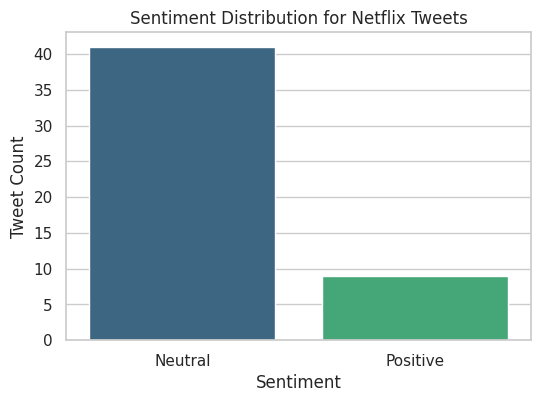

In [128]:
plt.figure(figsize=(6,4))
sns.countplot(data=tweets_df, x="Sentiment", hue="Sentiment", palette="viridis", legend=False)
plt.title(f"Sentiment Distribution for {asset_name} Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## Step 9: Visualize Sentiment Trend Across Tweets
We create a **line chart** showing polarity trend across the 50 tweets.


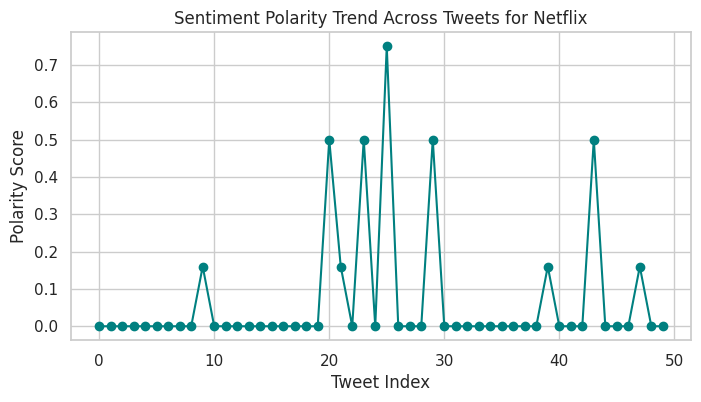

In [129]:
plt.figure(figsize=(8,4))
plt.plot(tweets_df.index, tweets_df["Polarity"], marker='o', linestyle='-', color='teal')
plt.title(f"Sentiment Polarity Trend Across Tweets for {asset_name}")
plt.xlabel("Tweet Index")
plt.ylabel("Polarity Score")
plt.grid(True)
plt.show()

## Step 10: Visualize Market Price Trend
For context, we visualize the closing price of the asset over the last 30 days.


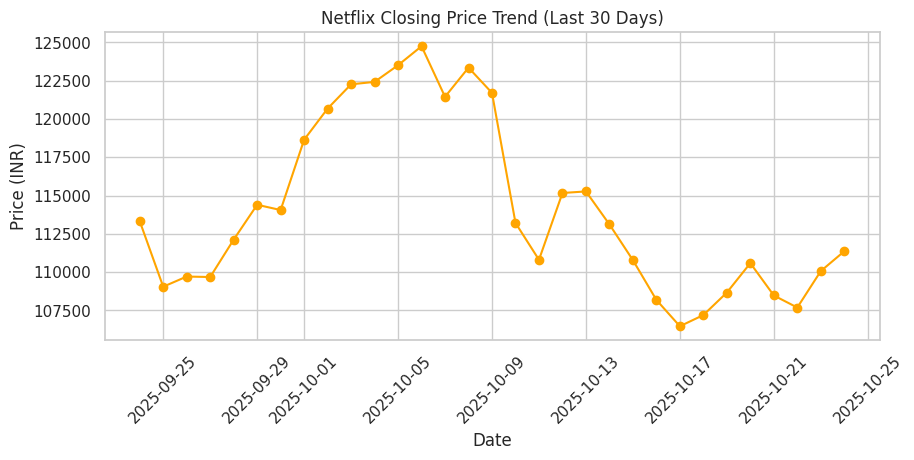

In [130]:
plt.figure(figsize=(10,4))
plt.plot(market_data["Date"], market_data["Close"], marker='o', color='orange')
plt.title(f"{asset_name} Closing Price Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Using Alpha Vantage for Stock Data


First, install the library:

In [131]:
!pip install alpha_vantage

### Analyze Alpha Vantage Data
Here are some descriptive statistics for the Alpha Vantage data:

In [132]:
display(data.describe())

,1. open,2. high,3. low,4. close,5. volume
count,2949.000000,2949.000000,2949.000000,2949.000000,2.949000e+03
mean,9.103380,9.191148,9.017662,9.106522,9.275504e+04
std,3.362291,3.361392,3.362167,3.362271,1.814479e+06
min,3.220000,3.400000,3.220000,3.290000,0.000000e+00
25%,6.090000,6.170000,6.020000,6.080000,6.995000e+03
50%,9.310000,9.420000,9.220000,9.301000,2.059200e+04
75%,11.342300,11.470000,11.210000,11.360000,4.557100e+04
max,19.760000,19.800000,19.760000,19.760000,9.700000e+07


Now, let's visualize the trading volume over time:

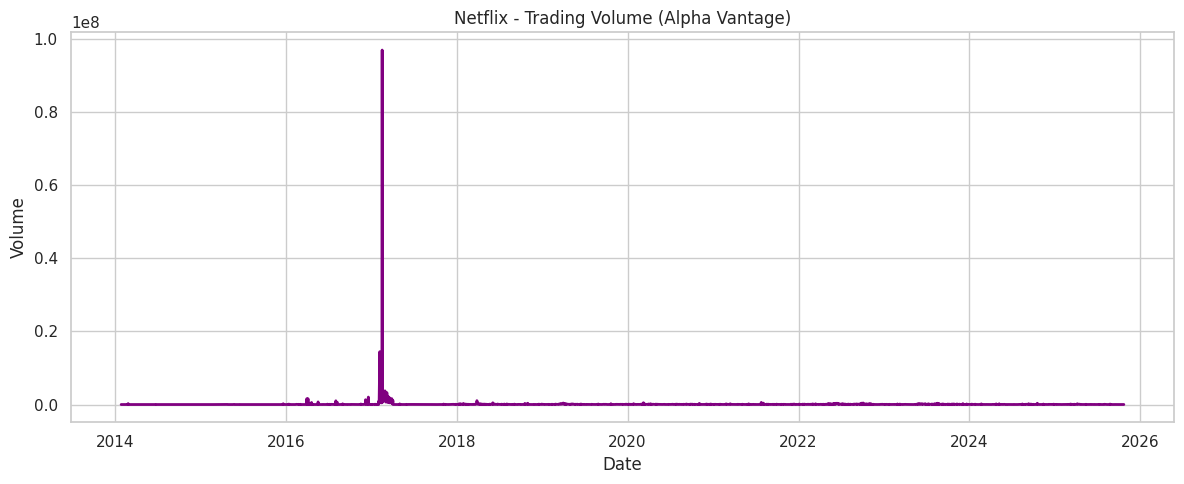

In [133]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['5. volume'], linewidth=2, color='purple')
plt.title(f"{asset_name} - Trading Volume (Alpha Vantage)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

In [136]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Replace with your Alpha Vantage API key
API_KEY = "BS1CQYGKGV02PINU"

ts = TimeSeries(key=API_KEY, output_format='pandas')

# Fetch daily time series data for the given asset name
try:
    # Alpha Vantage uses different symbols than Yahoo Finance,
    # you might need to adjust the symbol based on the asset_name
    # For example, for Bitcoin, you might need to use 'BTCUSD' or similar depending on the API
    # For simplicity, let's use a placeholder 'IBM' as an example
    if asset_name.upper() == "BITCOIN":
        # Alpha Vantage might have different symbols for cryptocurrencies
        # You would need to check their documentation for the correct symbol
        # As a placeholder, let's use a stock symbol
        symbol = "IBM"
    elif asset_name.upper() == "TESLA":
        symbol = "TSLA"
    elif asset_name.upper() == "INFOSYS":
        symbol = "INFY"
    elif asset_name.upper() == "RAKUTEN":
        symbol = "RKUNY"
    elif asset_name.upper() == "NETFLIX":
        symbol = "NFLX"
    else:
        # Use the asset name as the symbol for other cases,
        # but be aware that Alpha Vantage symbols might differ
        symbol = asset_name

    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    print(f"\n📊 Alpha Vantage Market Data Sample for {asset_name} ({symbol}):")
    display(data.head())
except Exception as e:
    print(f"Could not fetch Alpha Vantage data for {asset_name} ({symbol}): {e}")
    print("Please ensure you have a valid Alpha Vantage API key and that the symbol is correct.")


📊 Alpha Vantage Market Data Sample for Netflix (NFLX):


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-10-23,1126.900,1127.8285,1099.73,1113.59,6849722.0
2025-10-22,1142.900,1157.6000,1112.51,1116.37,14789025.0
2025-10-21,1242.830,1248.5999,1231.76,1241.35,6508234.0
2025-10-20,1207.875,1247.7600,1206.90,1238.56,3986235.0
2025-10-17,1183.600,1203.1200,1178.95,1199.36,2957101.0


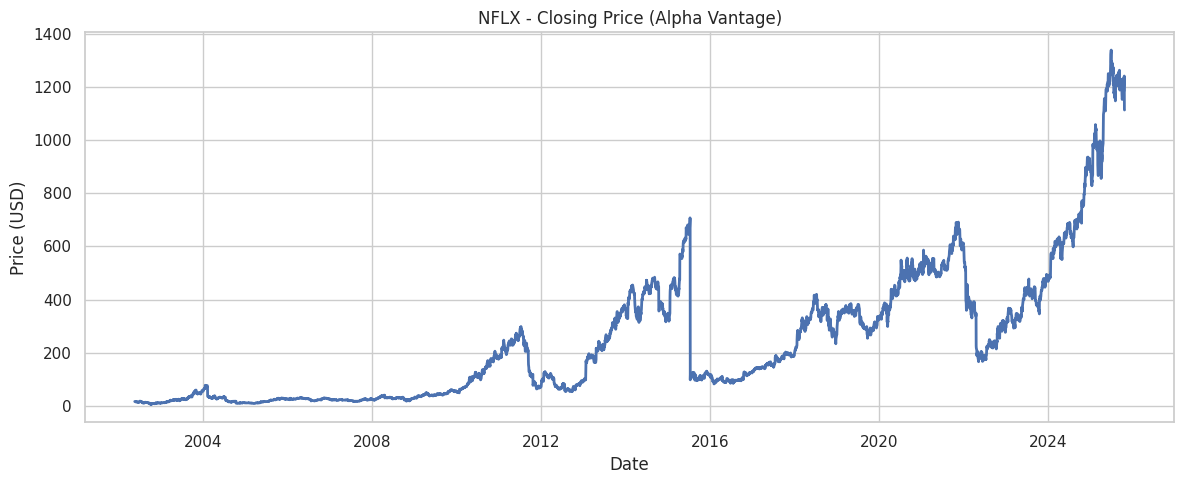

In [137]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data['4. close'], linewidth=2)
plt.title(f"{symbol} - Closing Price (Alpha Vantage)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

## Sprint 1 Conclusion
**What we achieved in Sprint 1:**

1. Collected real-time open-source data from:
   - Wikipedia (summary)
   - Yahoo Finance (market prices)
   - Google News RSS (recent headlines)
   - Generated synthetic tweets (50) for sentiment analysis
2. Cleaned and structured data using **pandas DataFrames**
3. Performed sentiment analysis using **TextBlob**
4. Visualized key insights:
   - Sentiment distribution (bar chart)
   - Sentiment trend across tweets (line chart)
   - Market price trend (line chart)
5. Built a flexible, interactive notebook for any asset/company input

This notebook sets the foundation for **Sprint 2**, where we will integrate **real-time dashboards and AI-driven analytics**.
